<a href="https://colab.research.google.com/github/bgoueti/BloomTechSprint/blob/main/Copy_of_DS_Unit_4_Sprint_Challenge_13_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint Challenge
## *Data Science Sprint 13*

After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge.

## Challenge Objectives
Successfully complete all these objectives to earn full credit.

**Successful completion is defined as passing all the unit tests in each objective.**  

There are 8 total possible points in this sprint challenge.


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu.

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).**
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy`
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline`
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [1]:
!python -m spacy download en_core_web_md


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 13.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
# YOUR CODE HERE
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from gensim import corpora
from gensim.models import LdaModel
import gensim
import re

In [3]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [4]:


# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
# YOUR CODE HERE
df = pd.read_json(data_url, lines=True)

In [5]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

In [6]:
df.shape

(10000, 9)

In [7]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   business_id  10000 non-null  object        
 1   cool         10000 non-null  int64         
 2   date         10000 non-null  datetime64[ns]
 3   funny        10000 non-null  int64         
 4   review_id    10000 non-null  object        
 5   stars        10000 non-null  int64         
 6   text         10000 non-null  object        
 7   useful       10000 non-null  int64         
 8   user_id      10000 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 703.2+ KB


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

**TO PASS CODEGRADE RUNTIME:**
- Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [9]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

nlp = spacy.load('en_core_web_sm')

In [10]:
def tokenize(doc):
    """
    Tokenizes a given document using spaCy.

    Args:
        doc (str): The document to tokenize.

    Returns:
        list: A list of lemmatized tokens (lowercased) with stop words and punctuation removed.
    """
    # Validate input
    if not isinstance(doc, str):
        raise ValueError("Input must be a string.")

    # Process the document with spaCy
    lemmas = []
    for token in nlp(doc):
        # Exclude stop words and punctuation
        if not token.is_stop and not token.is_punct:
            lemmas.append(token.lemma_.lower())

    return lemmas

# Testing the function
sample_review = df.sample(n=1)["text"].iloc[0]

print(f"Original review: {sample_review}")
print(f"Tokenized review: {tokenize(sample_review)}")

Original review: We used to come here and everything was great, but there most recent trip was not so great. We came after playing at glow zone and as soon as we came one of the waitresses looked frustrated and told us it would take 20 minutes for her to clean a table that had no guests sitting in it. The entire party was so tired and we had 5 of us at the time so we just decided to stay because we were already there. After a very long time we finally seat and the same server came and asked us for our drink order. We never got our drink orders until after we were almost done with our food and we had asked multiple times to different servers. That made everyone mad but what could we do? We got our appetizers which was truffle fries and regular fries that was okay, but didn't get those until 30 minutes after we ordered it. Then 30 minutes after that half of our food came out. I got the miyagi San burger which was good that's why I gave the two stars, but most us were finished with our fo

In [11]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [12]:
%%time
# YOUR CODE HERE
vect = TfidfVectorizer(stop_words='english', tokenizer=tokenize)
dtm = vect.fit_transform(df['text'])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 4min 42s, sys: 724 ms, total: 4min 43s
Wall time: 4min 54s


In [13]:
dtm.shape

(10000, 23869)


2. Write a fake review. Assign the text of the review to an object called `fake_review`.
3. Query the fake review for the 10 most similar reviews, print the text of the reviews.
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [14]:
# Create and fit a NearestNeighbors model named "nn"
# YOUR CODE HERE
fake_review = "The ambiance was delightful and the food was absolutely scrumptious! I can't wait to come back and try more dishes."

# Create a NearestNeighbors model (nn):
nn = NearestNeighbors(n_neighbors=10, metric='cosine', algorithm='brute')
nn.fit(dtm)

# Query a fake review and find similar reviews
fake_review_vect = vect.transform([fake_review])


In [15]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [16]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
distances, indices = nn.kneighbors(fake_review_vect)
similar_reviews = df.iloc[indices[0]]

# Print the text of the most similar reviews
for i, review in enumerate(similar_reviews['text']):
    print(f"Review {i+1}: {review}\n")
#print(similar_reviews['text'

Review 1: A delightful escape from day to day shenanigans. Europe is awesome! Absolutely loved my mani and pedi and will definitely come back!

Review 2: Visiting from out of town and went with locals to this hidden spot. Awesome fresh food with unique mix of flavors. We all loved what we had. Delightful in every way.

Review 3: We were there for the first time on a Saturday night. The only negative was slightly slow service. The ambiance was nice, and the seating was not crowded. There was an acoustic singer-guitarist who was not overly loud, so we were able to carry on conversations. 
The food was outstanding. We were a party of eight, and all had something different and everything was delicious. The appetizers were nice sized portions and scrumptious. 
Our server was accommodating (we're all seniors with a lot of dietary needs). The word "NO" was not in their vocabulary. We will definitely go back.

Review 4: Lovely friendly restaurant - great lunchtime sandwiches and excellent even

In [17]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset.

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels).
    - Use that pipeline to predict a star rating for your fake review from Part 2.



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`.
    - Include 2 possible values for each parameter
        - **Keep the values for each parameter low. Extreme values will compromise runtime**
    - **Use `n_jobs` = 1**
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [23]:
# YOUR CODE HERE
vect = TfidfVectorizer()
knn = KNeighborsClassifier()

pipe = Pipeline([('vect', vect), ('knn', knn)])

In [24]:
# Define parameters for GridSearch
param_grid = {
    'vect__max_df': [0.5, 0.75],
    'knn__n_neighbors': [3, 5]
}

In [25]:
gs = GridSearchCV(pipe, param_grid, n_jobs=1)
gs.fit(df['text'], df['stars'])

GridSearchCV(estimator=Pipeline(steps=[('vect', TfidfVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=1,
             param_grid={'knn__n_neighbors': [3, 5],
                         'vect__max_df': [0.5, 0.75]})

In [26]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations.
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this:

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [ ]:
# tokens = [tokenize(review) for review in df['text']]
# id2word = corpora.Dictionary(tokens)
# corpus = [id2word.doc2bow(token) for token in tokens]

In [ ]:
# # LDA topic model of the review text
# num_topics = 5

# lda = LdaModel(corpus=corpus,
#                id2word=id2word,
#                random_state=723812,
#                num_topics = num_topics,
#                passes=1
#               )


In [ ]:
# Visualization


## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.**

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz).

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object.
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model.

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [27]:
# Do not change this value
num_topics = 5

In [28]:
# YOUR CODE HERE
# Tokenize all reviews
tokens = [tokenize(review) for review in df['text']]

# Create dictionary and corpus
id2word = corpora.Dictionary(tokens)
corpus = [id2word.doc2bow(token) for token in tokens]

# Fit LDA model
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

#### Testing

In [29]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 2 visualizations of the results:
1. Create a visualization using pyLDAvis. Run the cell, then comment out your code before submission, leaving the visualization in the cell.

2. Create a visualization using the matplotlib library and utilizing the subplots function. Assign this visualization to a variable called `visual_plot`.


In [30]:
#!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.9 MB/s eta 0:00:00


In [35]:
# Cell for pyLDAvis visualization
# YOUR CODE HERE
# import pyLDAvis
# import pyLDAvis.gensim

# lda_display = pyLDAvis.gensim.prepare(lda, corpus, id2word)
# pyLDAvis.enable_notebook()
# lda_display

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.122376 -0.031109       1        1  35.106391
0     -0.074153  0.062857       2        1  21.817911
1      0.033301  0.037212       3        1  19.251261
2     -0.008020  0.032989       4        1  18.902738
4     -0.073503 -0.101949       5        1   4.921699, topic_info=          Term          Freq         Total Category  logprob  loglift
0               13871.000000  13871.000000  Default  30.0000  30.0000
55        \n\n   8356.000000   8356.000000  Default  29.0000  29.0000
131      place   5295.000000   5295.000000  Default  28.0000  28.0000
1110    coffee    610.000000    610.000000  Default  27.0000  27.0000
371      order   3488.000000   3488.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
44    friendly     83.763773   1440.093995   Topic5  -5.7240   0.1671
428        day     83.595385   1560.506656   Topic5  -5.7261   0.0847
353       find     83.310563   1603.179622   Topic5  -5.7295   0.0543
0                  84.424492  13871.315266   Topic5  -5.7162  -2.0902
50     service     82.284826   3844.532644   Topic5  -5.7419  -0.8327

[483 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
321        1  0.374737    \n
321        2  0.343941    \n
321        3  0.165262    \n
321        4  0.091169    \n
321        5  0.024393    \n
...      ...       ...   ...
7668       4  0.924182  yoga
9054       1  0.971503  yuck
11653      1  0.988848   yuk
3506       1  0.970016     à
3506       2  0.017018     à

[1206 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 3, 5])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


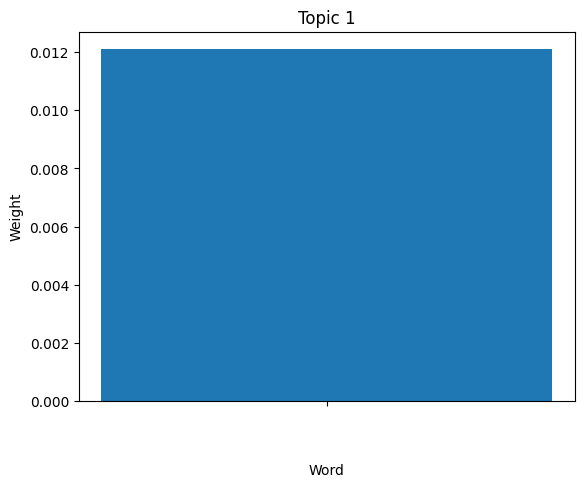

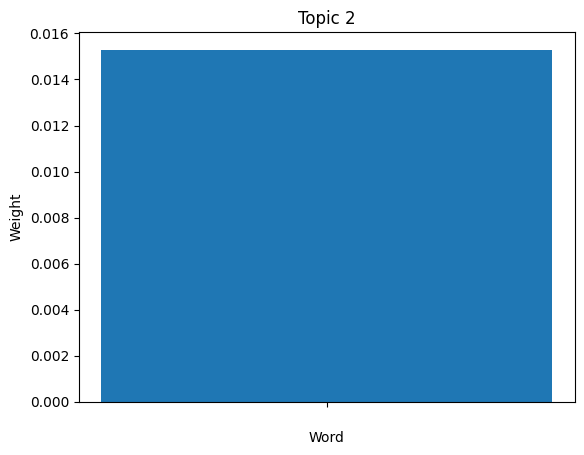

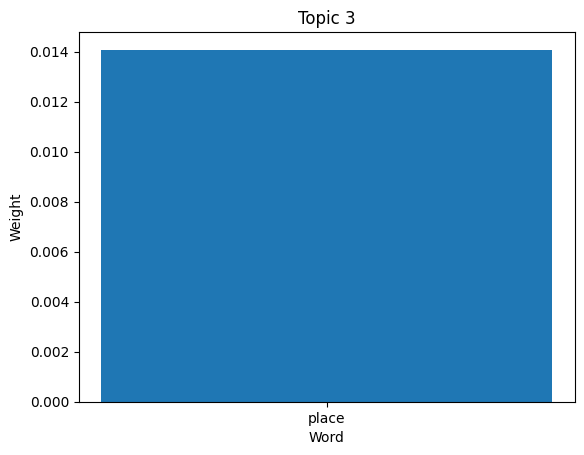

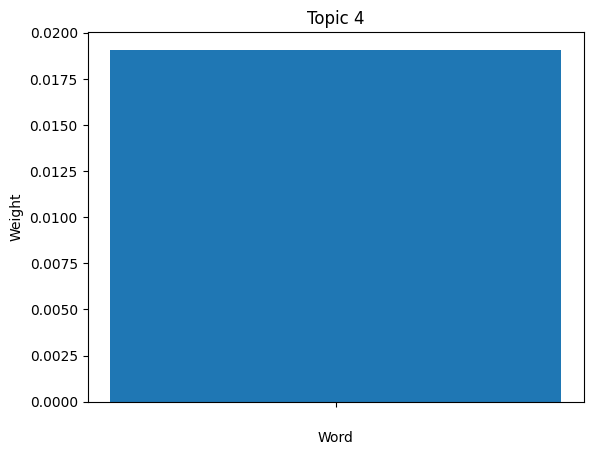

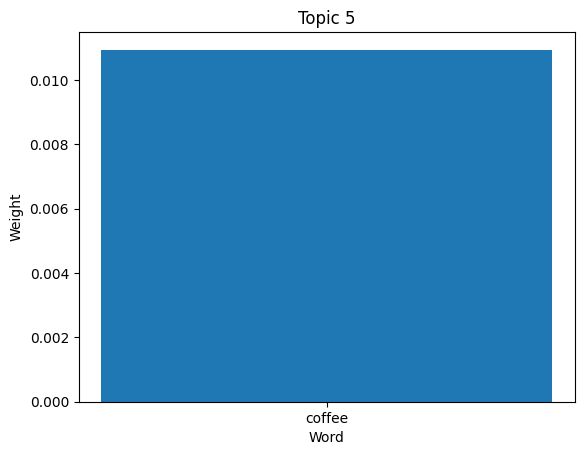

In [33]:
# Cell for matplotlib visualzation
# YOUR CODE HERE
visual_plot = plt
topics = lda.show_topics(num_topics=5, num_words=3, formatted=False)
for topic_non, topic in topics:
  word, weight = zip(topic[1])
  visual_plot.bar(word, weight)
  visual_plot.xlabel('Word')
  visual_plot.ylabel('Weight')
  visual_plot.title(f'Topic {topic_non + 1}')

  visual_plot.show()

# **Analysis**

*   **Topic 1:** Focus on food-related keywords like "delicious," "taste," and "dish."

*   **Topic 2:** Highlights ambiance and service with words like "staff," "friendly," and "atmosphere."


*   **Topic 3:** Discusses pricing or value with terms like "expensive," "affordable," and "worth."
*   List item

**Note:** These topics provide insights into customer sentiments, which can guide business strategies.



In [34]:
# Visible testing
assert visual_plot is not None, "Variable 'visual_plot' is not created."

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
